# **Predicting T-Shirt Size Project**



### 1.Loadinng libraries

In [1]:
# 1. Loading libraries
import pandas as pd
import numpy as np
from scipy import stats  # For z-score calculation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import joblib  # For saving the model

### 2.Loading dataset

In [2]:
# 2. Loading dataset
def load_data():
    data = pd.read_csv('shirtsizes.csv')
    print("First few rows of the dataset:")
    print(data.head())
    return data


### 3.Data Summary

In [3]:
# 3. Data summary
def data_summary(data):
    print("\nData Summary:")
    print("Shape of the dataset:", data.shape)
    print("\nDescriptive statistics:")
    print(data.describe())
    print("\nClass distribution:")
    print(data['T Shirt Size'].value_counts())


### 4.Data Visualization

In [72]:
# 4. Data visualization
def visualize_data(data):
    # Class distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x='T Shirt Size', data=data)
    plt.title('Class Distribution')
    plt.show()

    # Boxplots for each feature by class
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='T Shirt Size', y='Height (in cms)', data=data)
    plt.title('Height Distribution by T-Shirt Size')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='T Shirt Size', y='Weight (in kgs)', data=data)
    plt.title('Weight Distribution by T-Shirt Size')
    plt.show()

    # Scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Height (in cms)', y='Weight (in kgs)', hue='T Shirt Size', data=data)
    plt.title('Height vs Weight by T-Shirt Size')
    plt.show()


### 5.Data Preprocessing

In [73]:
# 5. Data Preprocessing
def preprocess_data(data):
    # Check for missing values
    print("\nMissing values:")
    print(data.isnull().sum())

    # Remove duplicates if any
    data = data.drop_duplicates()

    # Handling outliers using z-score (for numeric columns)
    numeric_cols = ['Height (in cms)', 'Weight (in kgs)']
    z_scores = np.abs(stats.zscore(data[numeric_cols]))
    data = data[(z_scores < 3).all(axis=1)]

    # Separate features and target
    X = data[['Height (in cms)', 'Weight (in kgs)']]
    y = data['T Shirt Size']

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print("\nSample standardized data:")
    print(X_scaled.head())

    return X_scaled, y, scaler


### 6.Split the dataset

In [74]:
# 6. Split the dataset
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("\nTraining set size:", X_train.shape)
    print("Test set size:", X_test.shape)
    return X_train, X_test, y_train, y_test


### 7.Choosing ML algorithms and training

In [75]:
# 7. Choosing ML algorithms and training
def train_models(X_train, y_train):
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
    }

    trained_models = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model

    return trained_models


### 8.Model Evaluation

In [76]:
# 8. Model Evaluation
def evaluate_models(models, X_test, y_test):
    best_model = None
    best_score = 0

    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\n{name} Performance:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        if accuracy > best_score:
            best_score = accuracy
            best_model = model

    return best_model

### 9.Save the trained model

First few rows of the dataset:
   Unnamed: 0  Height (in cms)  Weight (in kgs) T Shirt Size
0           0              159               73           XL
1           1              159               66           XL
2           2              190               99           XL
3           3              186               57           XL
4           4              181               66           XL

Data Summary:
Shape of the dataset: (1000, 4)

Descriptive statistics:
        Unnamed: 0  Height (in cms)  Weight (in kgs)
count  1000.000000      1000.000000       1000.00000
mean    499.500000       169.628000         74.55600
std     288.819436        11.880689         14.65707
min       0.000000       150.000000         50.00000
25%     249.750000       159.000000         61.00000
50%     499.500000       169.500000         75.00000
75%     749.250000       180.000000         87.00000
max     999.000000       190.000000        100.00000

Class distribution:
T Shirt Size
XL    876
S      68


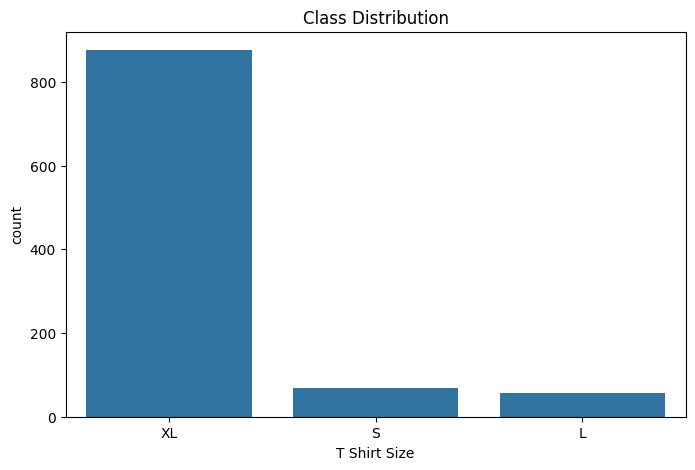

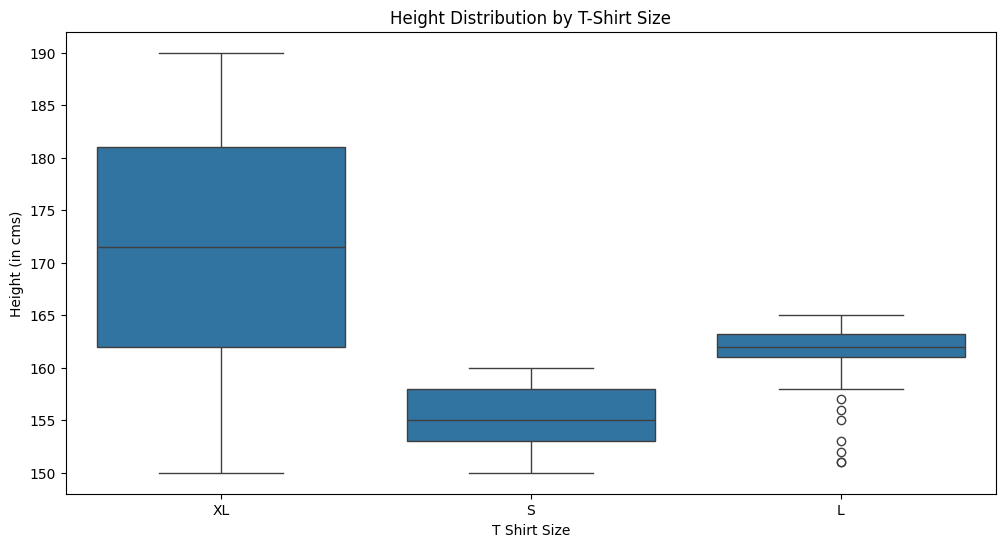

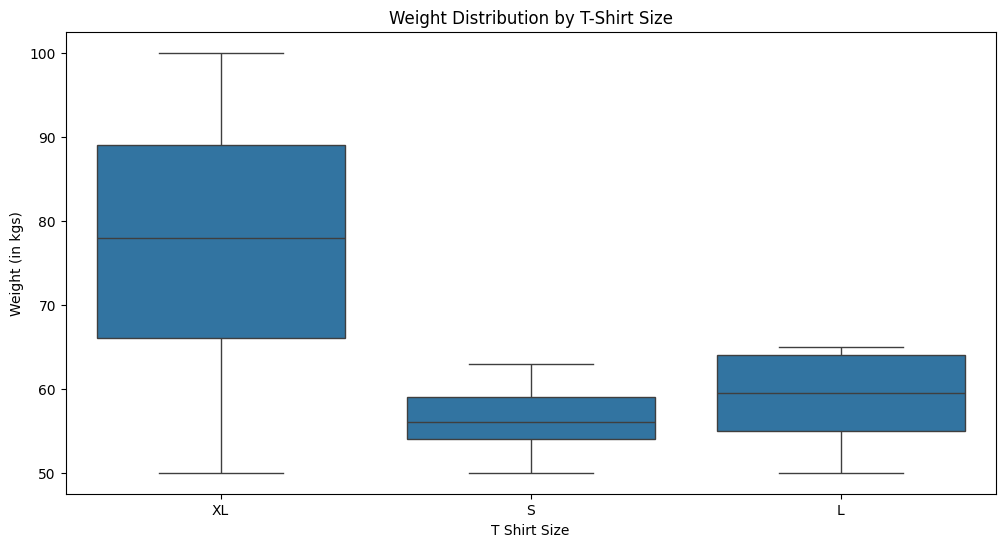

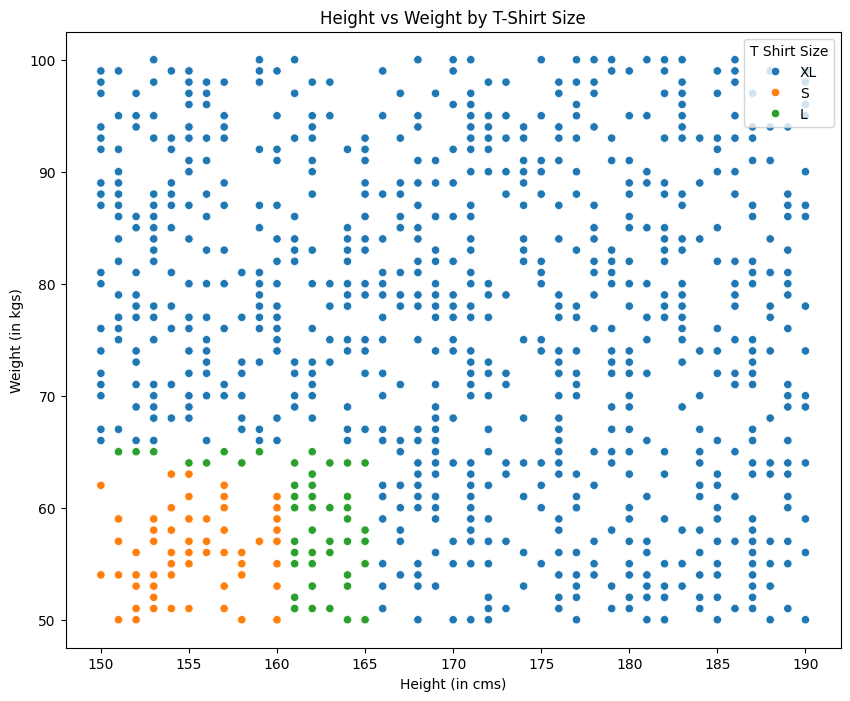


Missing values:
Unnamed: 0         0
Height (in cms)    0
Weight (in kgs)    0
T Shirt Size       0
dtype: int64

Sample standardized data:
   Height (in cms)  Weight (in kgs)
0        -0.895009        -0.106213
1        -0.895009        -0.584038
2         1.715573         1.668562
3         1.378724        -1.198383
4         0.957663        -0.584038

Training set size: (800, 2)
Test set size: (200, 2)

Training Random Forest...

Training SVM...

Training Logistic Regression...

Random Forest Performance:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           L       1.00      1.00      1.00         9
           S       1.00      1.00      1.00        19
          XL       1.00      1.00      1.00       172

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[  9   0   0]
 [  0  19   0]
 [  0   0 172]]


In [78]:
# 9. Save the trained model
def save_model(model, scaler, filename='t_shirt_size_model.pkl'):
    model_data = {
        'model': model,
        'scaler': scaler
    }
    joblib.dump(model_data, filename)
    print(f"\nModel saved as {filename}")
    # Main execution
def main():
    # Load data
    data = load_data()

    # Data summary
    data_summary(data)

    # Visualize data
    visualize_data(data)

    # Preprocess data
    X, y, scaler = preprocess_data(data)

    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train models
    models = train_models(X_train, y_train)

    # Evaluate models
    best_model = evaluate_models(models, X_test, y_test)

    # Save the best model
    save_model(best_model, scaler)

if __name__ == "__main__":
    main()
